In [3]:
%load_ext autoreload
%autoreload 2
# %matplotlib qt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
from ICARUS.Database.db import DB
from time import sleep
import numpy as np
import os

HOMEDIR = os.getcwd()

# Open Database

In [5]:
db = DB()
db.loadData()
db3d = db.vehiclesDB

No Plane object found in bmark folder at /mnt/c/Users/Tryfonas/Desktop/Uni/Software/hermes/Data/3D/bmark/dyn_bmark.json!
No Plane object found in orthogonal folder at /mnt/c/Users/Tryfonas/Desktop/Uni/Software/hermes/Data/3D/orthogonal/dyn_orthogonal.json!
No Plane object found in orthogonalSweep folder at /mnt/c/Users/Tryfonas/Desktop/Uni/Software/hermes/Data/3D/orthogonalSweep/dyn_orthogonalSweep.json!
No Plane object found in taper folder at /mnt/c/Users/Tryfonas/Desktop/Uni/Software/hermes/Data/3D/taper/dyn_taper.json!
No Plane object found in taperSweep folder at /mnt/c/Users/Tryfonas/Desktop/Uni/Software/hermes/Data/3D/taperSweep/dyn_taperSweep.json!


### Select Plane

In [6]:
planenames = db3d.getPlanes()
for i, planename in enumerate(planenames):
    print(f"{i} : `{planename}")
sleep(1)
index = [1,2,3,4]
#index = int(input("Select a plane: "))
plane = db3d.Planes[planenames[1]]
# dynplane = db3d.dynPlanes[planenames[index]]
planenames = [planenames[i] for i in index]


0 : `bmark
1 : `orthogonal
2 : `orthogonalSweep
3 : `taper
4 : `taperSweep


# Add XFLR Polars

In [7]:
from ICARUS.Software.XFLR5.polars import readPolars3D
from ICARUS.Database import XFLRDB
for name in planenames:
    if name.startswith("XFLR"):
        continue
    try:
        XFLR5PLANEDIR = os.path.join(XFLRDB,f"{name}.txt")
        readPolars3D(db3d,XFLR5PLANEDIR, name)
        print(f"Imported XFLR polar for {name}")
        planenames.append(f"XFLR_{name}")
    except FileNotFoundError:
        print(f"No XFLR polar found for {name}")
        
# if "Hermes" not in planenames:
#     print(f"Importing XFLR polar for Hermes")
#     if "XFLR_Hermes" not in planenames:
#         XFLR5PLANEDIR = os.path.join(XFLRDB,f"Hermes.txt")
#         readPolars3D(db3d,XFLR5PLANEDIR, 'Hermes')
#         planenames.append(f"XFLR_Hermes")

No XFLR polar found for orthogonal
No XFLR polar found for orthogonalSweep
No XFLR polar found for taper
No XFLR polar found for taperSweep


# Airplane Visualization

# Polars

In [8]:
from ICARUS.Visualization.airplanePolars import plotAirplanePolars

In [9]:
planenames 

['orthogonal', 'orthogonalSweep', 'taper', 'taperSweep']

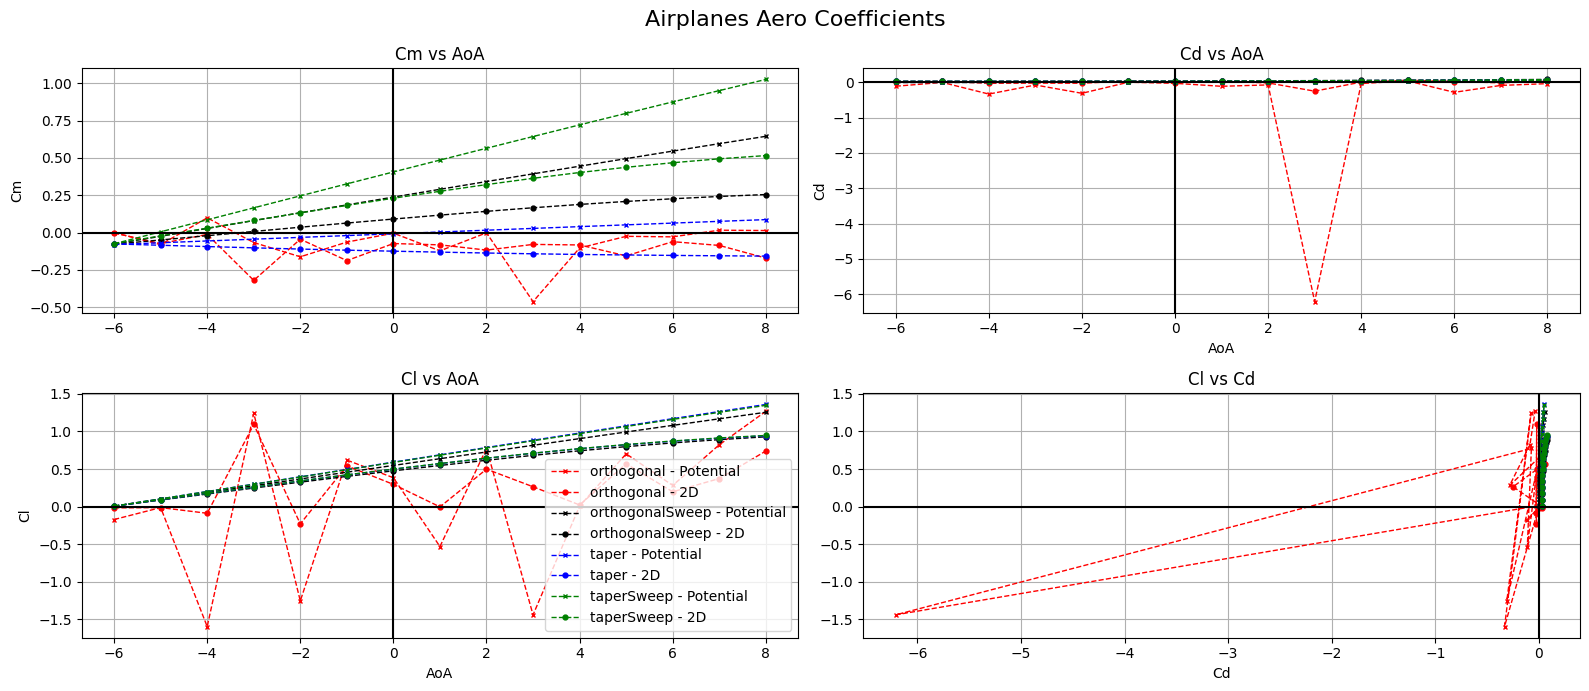

In [10]:
# db.makeData()
plotAirplanePolars(db3d.Data,planenames,["Potential","2D"],size=(16,7))

# Case Convergence

In [11]:
from ICARUS.Visualization.convergence import plotConvergence

/mnt/c/Users/Tryfonas/Desktop/Uni/Software/hermes/ICARUS/Visualization/convergence.py:138: UserWarning: Data has no positive values, and therefore cannot be log-scaled.
  ax.set_yscale("log")


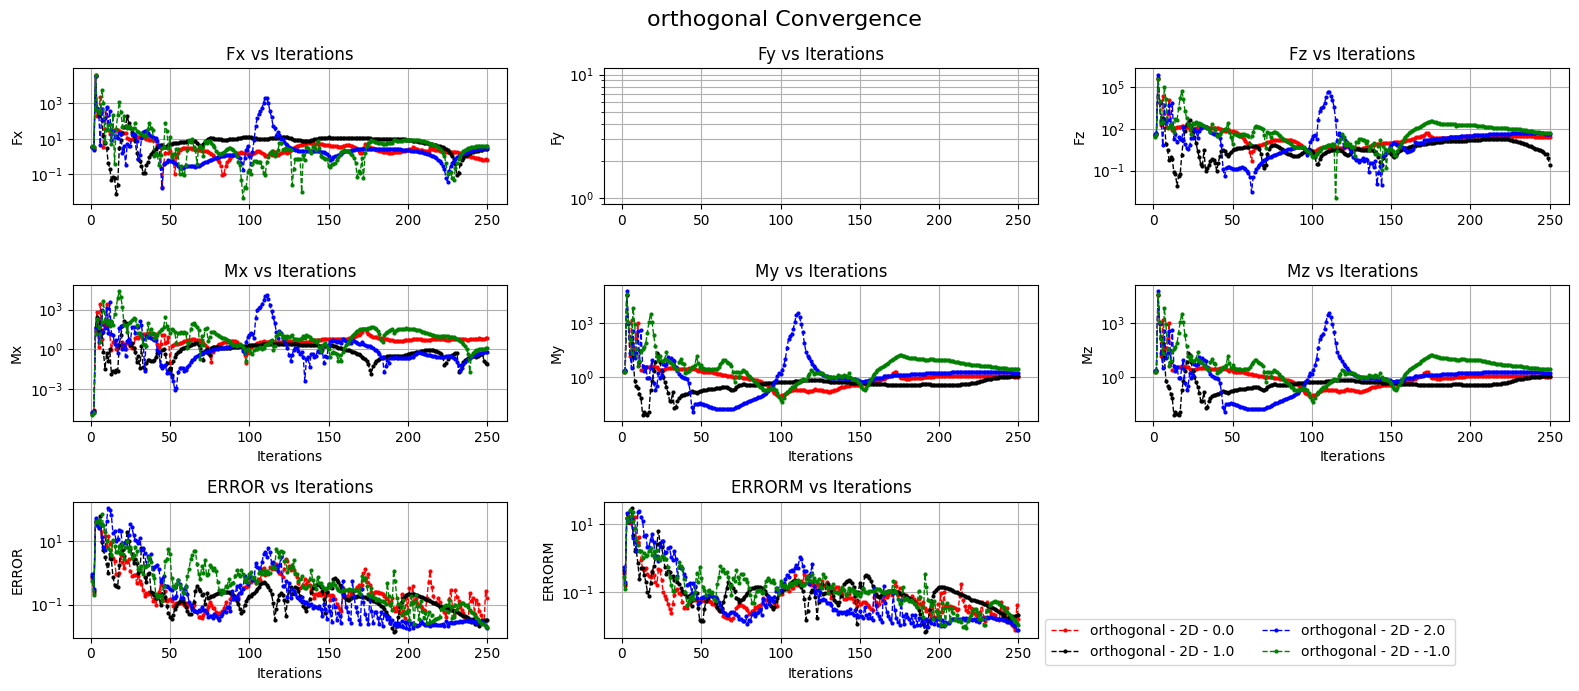

In [12]:
angles2show = np.arange(-1,3) # All
plotConvergence(db3d.Convergence, plane.name, angles = angles2show,
                solvers= ["2D"],plotError = False,size=(16,7))

In [13]:
plane.save()

# Sensitivity Plot

In [14]:
from ICARUS.Visualization.sensitivity import plotSensitivity

In [15]:
# pertr = dynplane.pertubResults
# print(dynplane.trim)
# trim = pertr[pertr['Type'] == 'Trim']
# dynplane.sensResults['u'].sort_values(by=['Epsilon'])
# plotSensitivity(dynplane.sensResults,dynplane,trim,relative = 0,vars2s=['r'])

# Wake Visualization

In [16]:
from ICARUS.Visualization.GNVPwake import GNVPwake
from ICARUS.Database.utils  import ang2case

AttributeError: 'Wing' object has no attribute 'is_symmetric'

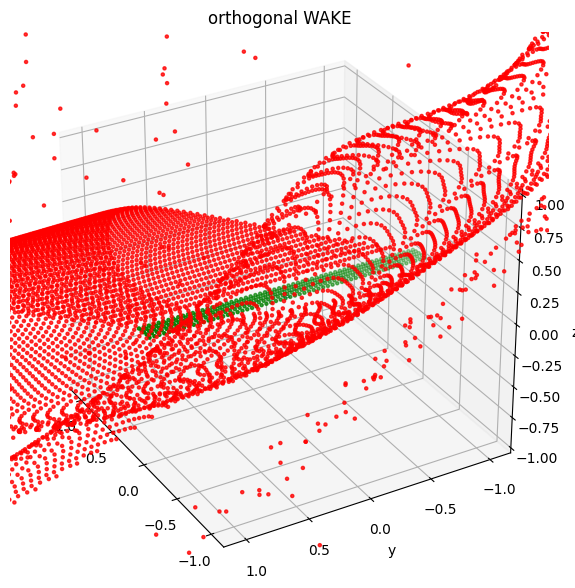

In [17]:
CASE = ang2case(1.)
# plane = db3d.Planes["Hermes"]
GNVPwake(plane,CASE)

# Loads Visualization

In [ ]:
from ICARUS.Visualization.GNVPstrips import GNVPstrips3D,GNVPstrips2D
NBs = [i+1 for i in range(len(plane.surfaces))]
print(plane)
print("NBs to Visualize: ",NBs)

stripData = GNVPstrips2D(plane,CASE, NBs[0], category= 'Wind')

# Dynamics

In [ ]:
dyn = db3d.dynPlanes['Hermes']

In [ ]:
dyn.stabilityFD()
print(dyn.SBderivativesDS)
#   Longitudinal derivatives
#   Xu=    -0.16379         Cxu=   -0.049477
#   Xw=      1.1494         Cxa=     0.34723
#   Zu=     -3.0117         Czu=  -0.0035415
#   Zw=     -19.528         CLa=      5.8991
#   Zq=     -1.8321         CLq=      9.1645
#   Mu= -0.00060463         Cmu=  -0.0015122
#   Mw=    -0.45664         Cma=     -1.1421
#   Mq=    -0.39098         Cmq=     -16.193

#   Lateral derivatives
#   Yv=     -0.5496         CYb=    -0.16602
#   Yp=   -0.017022         CYp=  -0.0045504
#   Yr=     0.32383         CYr=    0.086568
#   Lv=    0.039731         Clb=   0.0053106
#   Lp=     -5.6227         Clp=     -0.6651
#   Lr=      1.0377         Clr=     0.12275
#   Nv=     0.28879         Cnb=    0.038602
#   Np=    -0.57586         Cnp=   -0.068117
#   Nr=     -0.1259         Cnr=   -0.014893


In [ ]:
from ICARUS.Flight_Dynamics.Stability.state import State

a = State(dyn, 'Trim', dyn.trim)
a.plotEig()

In [ ]:
print(a)